In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
train_data = pd.read_csv('/content/loan-train.csv')

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
train_data.isnull().sum()/len(train_data)*100

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [17]:
for column in train_data.columns:
  if train_data[column].isnull().any():
    train_data[column].fillna(train_data[column].mode()[0],inplace=True)

train_data.isnull().sum()

<ipython-input-17-b0bcc2152c44>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].mode()[0],inplace=True)


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [18]:
train_data.duplicated().any()

False

In [19]:
train_data.drop('Loan_ID',axis=1,inplace=True)

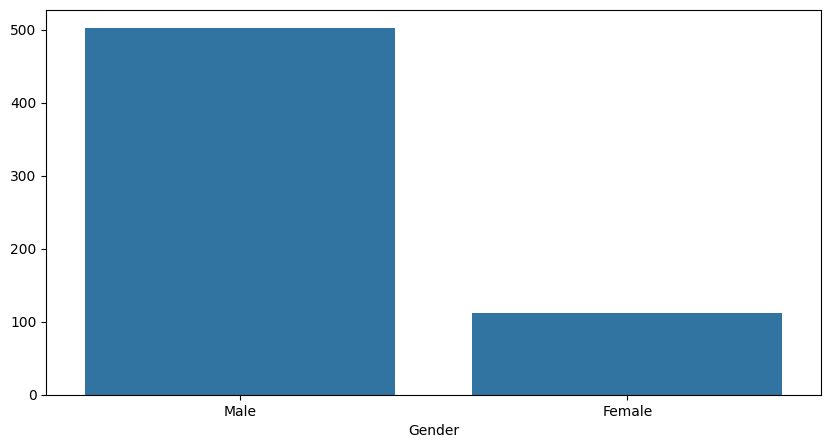

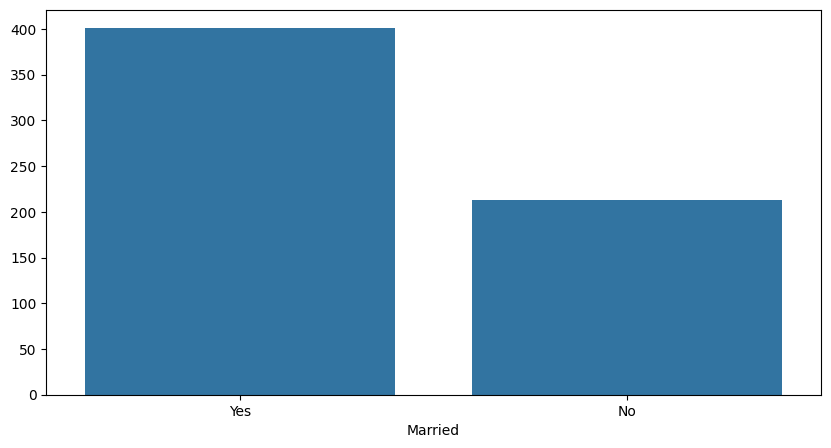

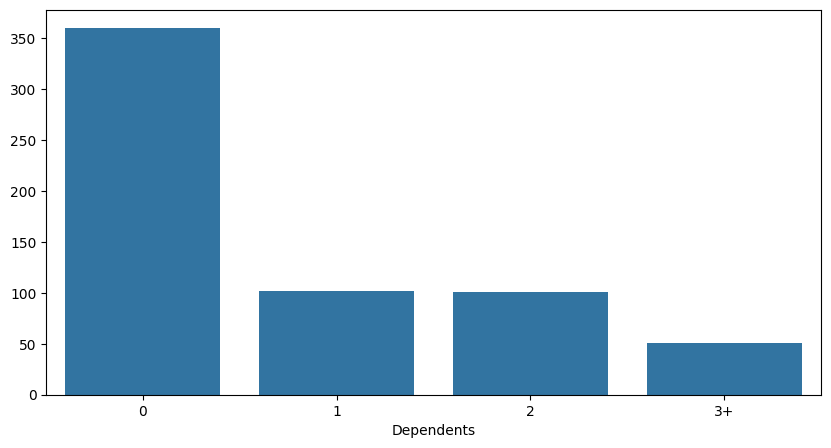

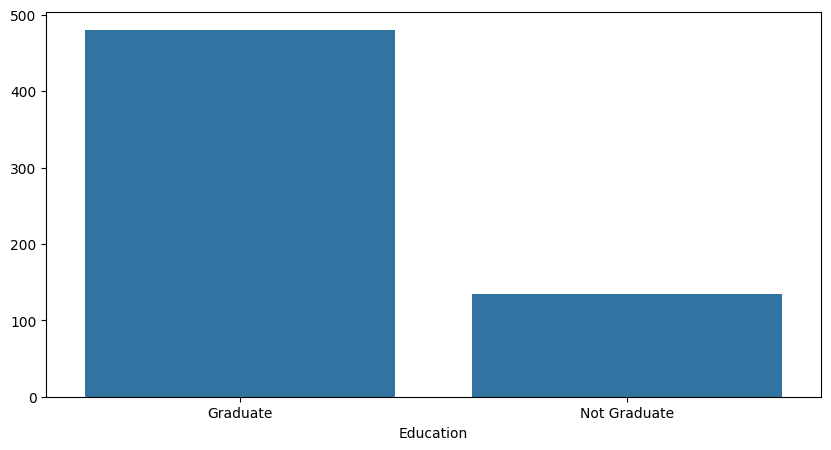

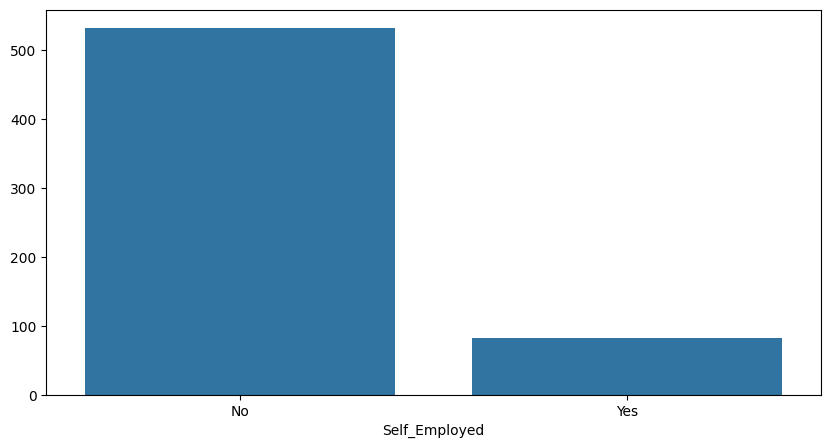

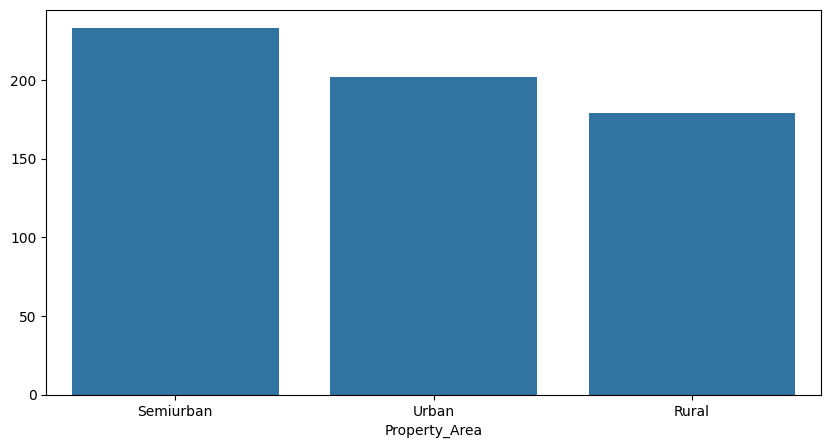

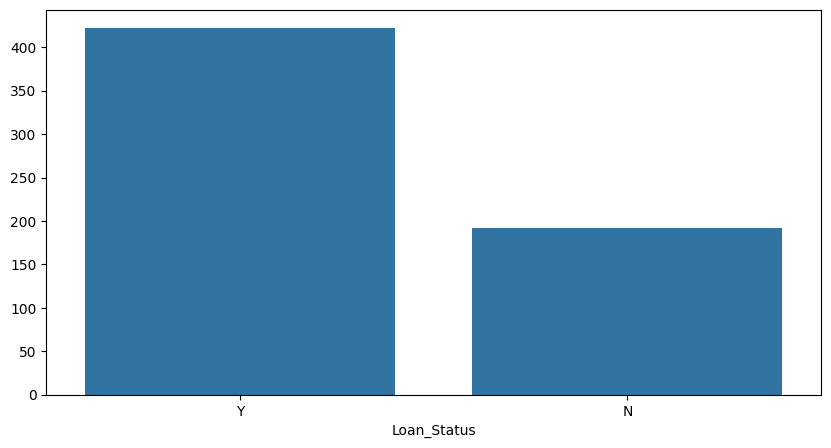

In [20]:
categorical_features = train_data.select_dtypes(include=['object']).columns
for column in categorical_features:
  count = train_data[column].value_counts()
  plt.figure(figsize=(10,5))
  sns.barplot(x=count.index,y=count.values)

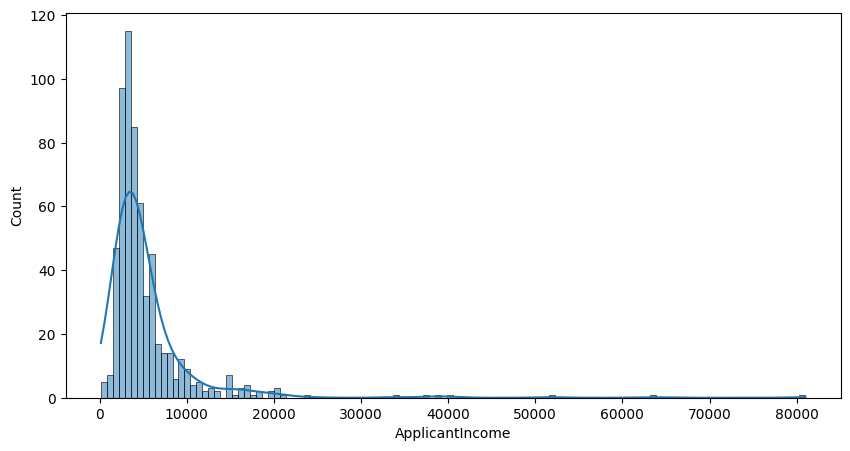

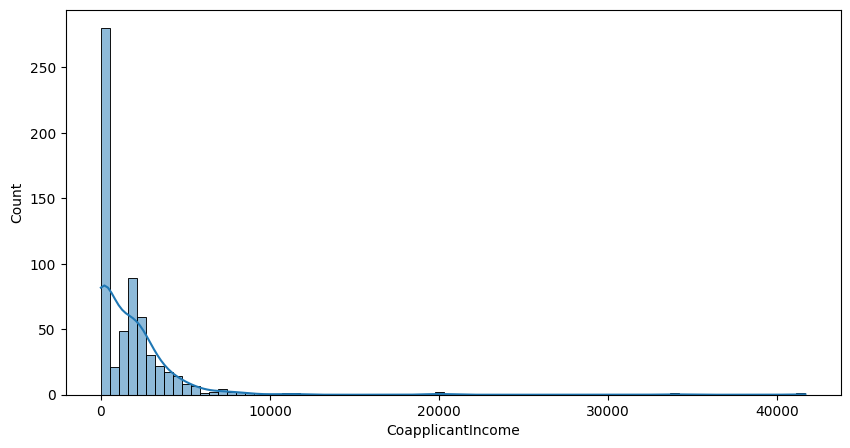

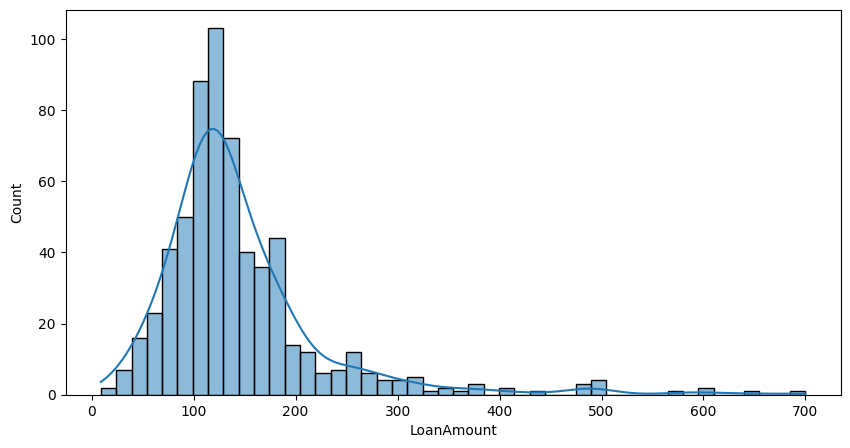

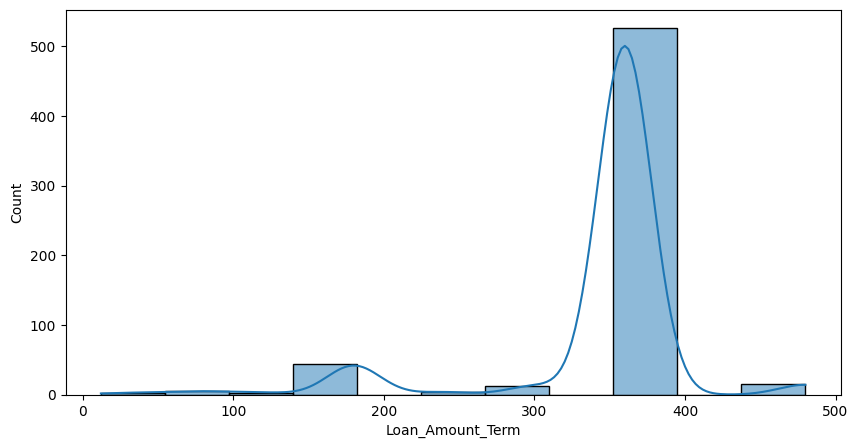

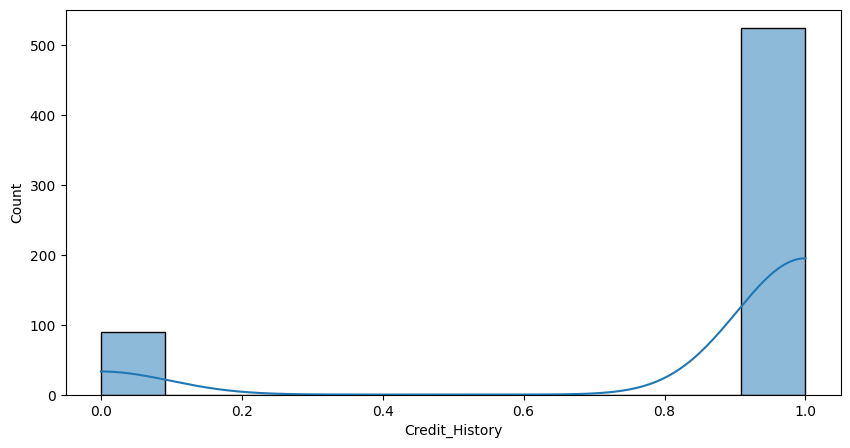

In [21]:
Num_features = train_data.select_dtypes(include=['float64','int64']).columns
for column in Num_features:
  plt.figure(figsize=(10,5))
  sns.histplot(train_data[column],kde=True)

From this analysis we found the distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed (which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer) and it has outliers. On the other hand, The distribution of Loan Amount Term is negatively skewed and it has outliers.

In [22]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df


for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    train_data = handle_outliers(train_data, col)



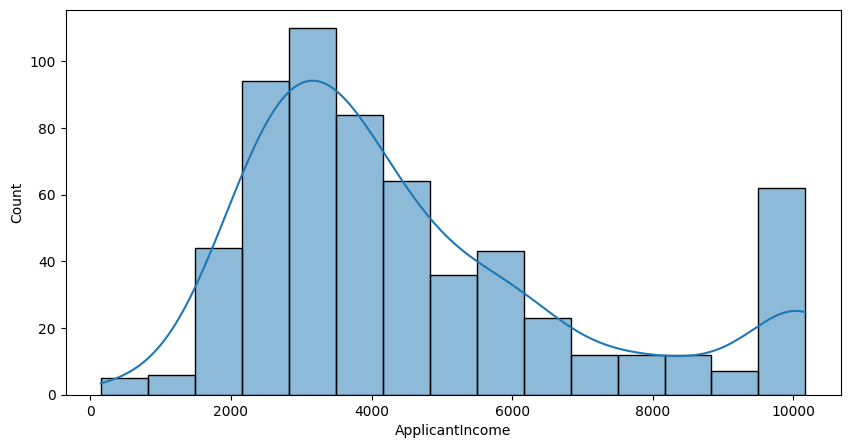

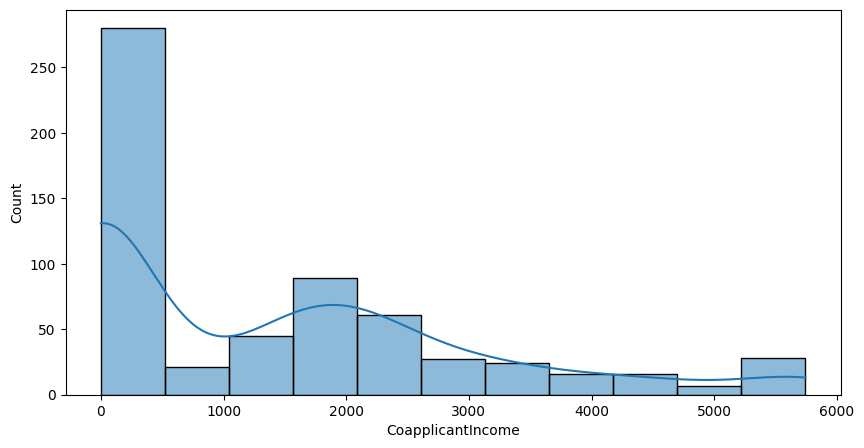

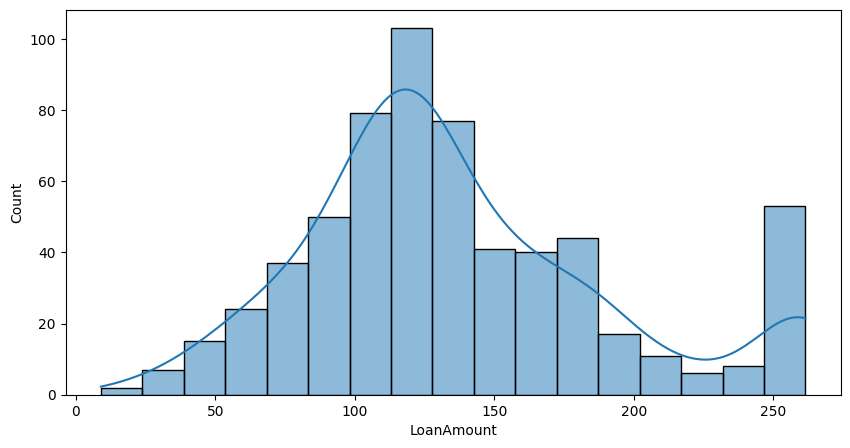

In [23]:
Num_features = train_data.select_dtypes(include=['float64','int64']).columns
for column in Num_features[:3]:
  plt.figure(figsize=(10,5))
  sns.histplot(train_data[column],kde=True)

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

scaler = MinMaxScaler()

for column in Num_features:
    train_data[[column]] = scaler.fit_transform(train_data[[column]])

encoder = LabelEncoder()

for column in categorical_features:
    train_data[column] = encoder.fit_transform(train_data[column])


In [25]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.568692,0.000000,0.439604,0.74359,1.0,2,1
1,1,1,1,0,0,0.442360,0.262575,0.471287,0.74359,1.0,0,0
2,1,1,0,0,1,0.284396,0.000000,0.225743,0.74359,1.0,2,1
3,1,1,0,1,0,0.242784,0.410578,0.439604,0.74359,1.0,2,1
4,1,0,0,0,0,0.583760,0.000000,0.522772,0.74359,1.0,2,1


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, lr_pred))
print(f"Accuracy: {accuracy_score(y_test, lr_pred)}")


Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy: 0.7886178861788617


In [28]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("\nSVM:")
print(classification_report(y_test, svm_pred))
print(f"Accuracy: {accuracy_score(y_test, svm_pred)}")


SVM:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy: 0.7886178861788617


In [29]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest:")
print(classification_report(y_test, rf_pred))
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")


Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

Accuracy: 0.7723577235772358


In [30]:
from sklearn.model_selection import cross_val_score

# Logistic Regression with cross-validation
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5)
print("\nLogistic Regression Cross-Validation:")
print("Scores:", lr_cv_scores)
print("Mean Accuracy:", lr_cv_scores.mean())
print("Standard Deviation:", lr_cv_scores.std())


# SVM with cross-validation
svm_cv_scores = cross_val_score(svm_model, X, y, cv=5)
print("\nSVM Cross-Validation:")
print("Scores:", svm_cv_scores)
print("Mean Accuracy:", svm_cv_scores.mean())
print("Standard Deviation:", svm_cv_scores.std())

# Random Forest with cross-validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nRandom Forest Cross-Validation:")
print("Scores:", rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())
print("Standard Deviation:", rf_cv_scores.std())



Logistic Regression Cross-Validation:
Scores: [0.81300813 0.7804878  0.7804878  0.85365854 0.81147541]
Mean Accuracy: 0.8078235372517659
Standard Deviation: 0.026964969382167303

SVM Cross-Validation:
Scores: [0.81300813 0.7804878  0.7804878  0.85365854 0.81967213]
Mean Accuracy: 0.809462881514061
Standard Deviation: 0.027383073694490688

Random Forest Cross-Validation:
Scores: [0.7804878  0.74796748 0.77235772 0.82926829 0.77868852]
Mean Accuracy: 0.7817539650806344
Standard Deviation: 0.02645156844130898


In [36]:
import joblib

model_filename = '/content/model.joblib'
joblib.dump(lr_model,model_filename)

print(f"Model saved to {model_filename}")


Model saved to /content/model.joblib
